## Continues Event

In [27]:
import sympy as sp
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
t = sp.symbols("t")
r, a = sp.symbols("r, alpha")
s, b = sp.symbols("s, beta")
x, y = sp.Function("x")(t), sp.Function("y")(t)

In [8]:
dxdt = sp.Eq(x.diff(t), r*x-a*x*y)
dxdt

Eq(Derivative(x(t), t), -alpha*x(t)*y(t) + r*x(t))

In [9]:
dydt = sp.Eq(y.diff(t), -s*y+b*x*y)
dydt

Eq(Derivative(y(t), t), beta*x(t)*y(t) - s*y(t))

In [24]:
r = 0.001
a = 0.000002
s = 0.01
b = 0.000001
dxdt = sp.Eq(x.diff(t), r*x-a*x*y)
dydt = sp.Eq(y.diff(t), -s*y+b*x*y)
y0 = 600
x0 = 12000

# Exact solution
# sol_x = sp.dsolve(dxdt, x)
# sol_y = sp.dsolve(dydt, y)


def system(t, z):
    x, y = z
    dxdt = r*x - a*x*y
    dydt = -s*y + b*x*y
    return [dxdt, dydt]

t_span = (0, 4000) # from t=0 to t=100
t_eval = np.linspace(0, 4000, 10000)

sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)

In [25]:
t_vals = sol.t
x_vals, y_vals = sol.y

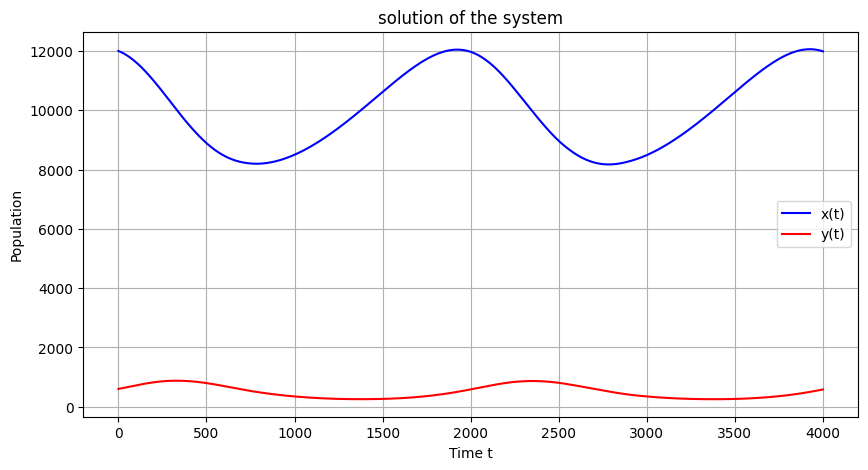

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_vals, label="x(t)", color="blue")
plt.plot(t_vals, y_vals, label="y(t)", color="red")
plt.xlabel("Time t")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.title("solution of the system")
plt.show()

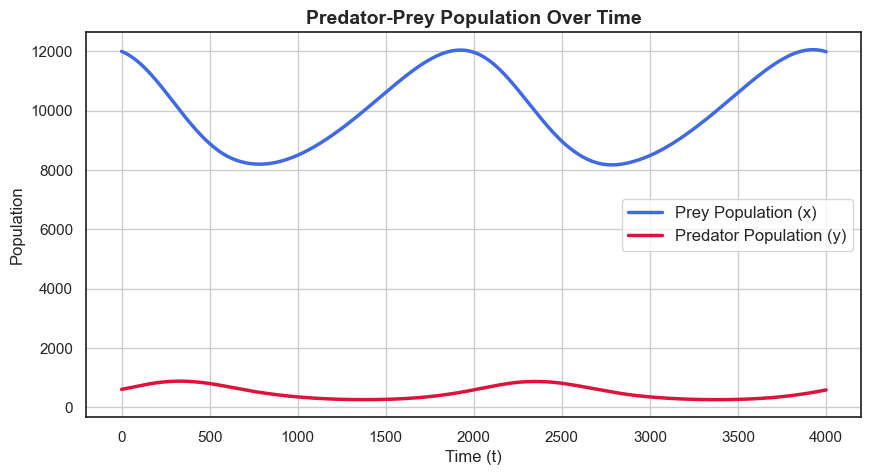

In [35]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 5))
sns.lineplot(x=t_vals, y=x_vals, label="Prey Population (x)", color="royalblue", linewidth=2.5)
sns.lineplot(x=t_vals, y=y_vals, label="Predator Population (y)", color="crimson", linewidth=2.5)

plt.xlabel("Time (t)", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.title("Predator-Prey Population Over Time", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [66]:
from colorama import Fore

In [ ]:
N = 6
A = [55, 32, 24, 40, 12, 29]
S = [43, 36, 34, 16, 25, 19]

arrival_time = []
for i in range(N):
    arrival_time.append(sum(A[:i+1]))

print(Fore.GREEN + f"Arrival times: " + Fore.RESET + f"{arrival_time}")

departure_time = [0]
for i in range(N):
    temp1 = arrival_time[i] + S[i]
    temp2 = departure_time[i] + S[i]
    departure_time.append(max([temp1, temp2]))

service_start_time = []
for i in range(N):
    service_start_time.append(max(arrival_time[i], departure_time[i]))


departure_time = departure_time[1:]
print(Fore.GREEN + f"Departure times: " + Fore.RESET + f"{departure_time}")
print(Fore.GREEN + f"Service Start times: " + Fore.RESET + f"{service_start_time}")

wating_time_in_que = []
for i in range(N):
    wating_time_in_que.append(service_start_time[i] - arrival_time[i])
print(Fore.GREEN + "Wating time: " + Fore.RESET + f"{wating_time_in_que}")

wating_time_in_system = []
for i in range(N):
    wating_time_in_system.append(departure_time[i] - arrival_time[i])
print(Fore.GREEN + "time in system is " + Fore.RESET + f"{wating_time_in_system}")



Arrival times: [55, 87, 111, 151, 163, 192]
Departure times: [98, 134, 168, 184, 209, 228]
Service Start times: [55, 98, 134, 168, 184, 209]
Wating time: [0, 11, 23, 17, 21, 17]
time in system is [43, 47, 57, 33, 46, 36]


In [ ]:
# adjust for 3 person
n = 3
arrival_time = arrival_time[:n]
departure_time = departure_time[:n]
service_start_time = service_start_time[:n]
wating_time_in_que = wating_time_in_que[:n]
wating_time_in_system = wating_time_in_system[:n]

In [ ]:
average_wating_time_in_que = sum(wating_time_in_que)/len(wating_time_in_que)
average_wating_time_in_system = sum(wating_time_in_system)/len(wating_time_in_system)

print(Fore.RED+"average wating time in que is  ->  "+ Fore.RESET +str(average_wating_time_in_que))
print(Fore.RED+"average wating time in system is  ->  "+ Fore.RESET +str(average_wating_time_in_system))

lamb = N/sum(A)
average_number_of_people = lamb * average_wating_time_in_system
print(Fore.RED + "average number of people in que is  ->  " + Fore.RESET + str(average_number_of_people))

average wating time is  ->  11.333333333333334
average time in system is  ->  49.0
average number of people in que is  ->  1.53125


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 9
M = 100
arrive_interval = [0.4, 1.2, 0.5, 1.7, 0.2, 1.6, 0.2, 1.4, 1.9]
service_time = [2, 0.7, 0.2, 1.1, 3.7, 0.6, M, M, M]

t_departure_i0 = 0
temp_event = []
for i in range(N):
    t_arrival_i = sum(arrive_interval[:i+1])
    t_departure_i = max(t_arrival_i + service_time[i], t_departure_i0 + service_time[i])
    t_start_service = max(t_arrival_i, t_departure_i0)
    t_departure_i0 = t_departure_i
    temp_event.append([i+1, "arrival", t_arrival_i])
    temp_event.append([i+1, "departure", t_departure_i])
    temp_event.append([i+1, "start_service", t_start_service])
temp_event_sorted = sorted(temp_event, key=lambda x: x[2])
events = pd.DataFrame({
    "#": [i[0] for i in temp_event_sorted],
    "type": [i[1] for i in temp_event_sorted],
    "time": [i[2] for i in temp_event_sorted]
})
events


,#,type,time
0,1,arrival,0.4
1,1,start_service,0.4
2,2,arrival,1.6
3,3,arrival,2.1
4,1,departure,2.4
5,2,start_service,2.4
6,2,departure,3.1
7,3,start_service,3.1
8,3,departure,3.3
9,4,arrival,3.8


In [29]:
def make_event_table(arrival_intervals:list, service_time:list, m:int=100) -> pd.DataFrame:
    n = len(arrival_intervals)
    for _ in range(len(arrival_intervals)-len(service_time)):
        service_time.append(m)

    t_departure_i0 = 0
    temp_event = []
    for i in range(n):
        t_arrival_i = sum(arrival_intervals[:i+1])
        t_departure_i = max(t_arrival_i + service_time[i], t_departure_i0 + service_time[i])
        t_start_service = max(t_arrival_i, t_departure_i0)
        t_departure_i0 = t_departure_i
        temp_event.append([i+1, "arrival", t_arrival_i])
        temp_event.append([i+1, "departure", t_departure_i])
        temp_event.append([i+1, "start_service", t_start_service])
    temp_event_sorted = sorted(temp_event, key=lambda x: x[2])
    events = pd.DataFrame({
        "#": [i[0] for i in temp_event_sorted],
        "type": [i[1] for i in temp_event_sorted],
        "time": [i[2] for i in temp_event_sorted]
    })
    return events
        

In [33]:
events = make_event_table(arrival_intervals=arrive_interval, service_time=service_time)
events

,#,type,time
0,1,arrival,0.4
1,1,start_service,0.4
2,2,arrival,1.6
3,3,arrival,2.1
4,1,departure,2.4
5,2,start_service,2.4
6,2,departure,3.1
7,3,start_service,3.1
8,3,departure,3.3
9,4,arrival,3.8


In [38]:
class Statistical_Counters:
    def __init__(self,
                 number_delayed,
                 total_delay,
                 area_under_qt,
                 area_under_bt):
        self.number_delayed = number_delayed
        self.total_delay = total_delay
        self.area_under_qt = area_under_qt
        self.area_under_bt = area_under_bt

class System_State:
    def __init__(self, server_status, 
                 number_in_queue,
                 time_of_arrival,
                 time_of_last_event):
        self.server_status = server_status
        self.number_in_queue = number_in_queue
        self.time_of_arrival = time_of_arrival
        self.time_of_last_event = time_of_last_event

    def set_statistical_counters(self, statistical_counters: Statistical_Counters):
        self.statistical_counters = statistical_counters




In [ ]:
time = 0
system_states = []

temp_state = System_State(server_status=0,
                          number_in_queue=0,
                          time_of_arrival=[],
                          time_of_last_event=0)
temp_state.set_statistical_counters(
    statistical_counters=Statistical_Counters(number_delayed=0,
                                              total_delay=0,
                                              area_under_qt=0,
                                              area_under_bt=0)
)
system_states.append(temp_state)

event_num = 0
# while True:
event_num += 1
system_state_init = system_states[event_num-1]
event_person, event_type, event_time = events.loc[event_num]
if event_type == "arrival":
    if system_state_init.server_status == 0:
        server_status = 1
        number_in_queue = 0
    elif system_state_init.server_status == 1:
        server_status = 1
        number_in_queue = system_state_init.number_in_queue + 1

    time_of_last_event = time



(np.int64(1), 'arrival', np.float64(0.4))